In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data",
    sep='\t', index_col=0,
)

In [3]:
df = df[df['train'] == 'T']
X = df.drop(columns=['lpsa', 'train']).astype(float)
y = df['lpsa'].astype(float)

In [4]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), index=X.index, columns=X.columns)

In [5]:
_, _, coefs = linear_model.lars_path(X.values, y, method='lasso')

In [6]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

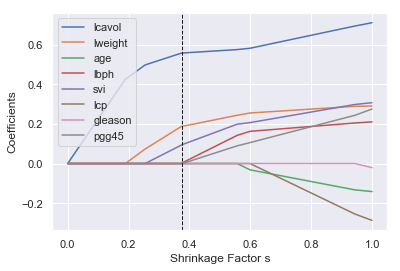

In [7]:
ax = pd.DataFrame(data=coefs.T, index=xx, columns=X.columns).plot()
ax.set_xlabel("Shrinkage Factor s")
ax.set_ylabel("Coefficients")
ax.axvline(x=xx[4], color='k', linestyle='--', linewidth=1);